In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy.stats as stats
import pandas as pd
import itertools

In [2]:
data_source = ["results/ParameterizedAB-nm.csv", "results/ParameterizedAB-adam.csv", "results/ParameterizedAB-adagrad.csv", "results/Layered-nm.csv", "results/Layered-adam.csv", "results/Layered-adagrad.csv", "results/PairwiseCRot-nm.csv", "results/PairwiseCRot-adagrad.csv", "results/PairwiseCRot-adam.csv"]
circuit_library = ["Layered", "HardwareEfficient",
                    "ParameterizedAB", "StronglyEntangled", "PairwiseCRot"]
optimizers = ["adam", "adagrad", "nm"]
datasets = ["iris", "banknote", "transfusion", "synth"]
test = ["Layered", "ParameterizedAB", "PairwiseCRot"]
iteration_index = 3
it_num = 0
test_accuracy_index = 7

dictionary = {}
head = ['optimizer', 'circuit', 'dataset', 'iteration', 'epoch', 'cost', 'train_acc', 'test_acc', 'trained_weights', 'untrained_weights', 'shape']
for source in data_source:
    with open(source, newline="") as csvfile:
        reader = csv.reader(csvfile)
        test_accuracy = np.array([])
        iteration = np.array([])
        for row in reader:
            if row[0] == 'optimizer':
                continue
            else:
                if(int(row[4]) % 5 == 0):
                    iteration = np.append(iteration, row[4]) 
                    test_accuracy = np.append(test_accuracy, row[test_accuracy_index])
            if(int(row[4]) == 99 and row[0] != 'optimizer'):
                dictionary[row[0], row[1], row[2], row[3]] = (test_accuracy.astype(float)), (iteration.astype(float))
                test_accuracy = np.array([])
                iteration = np.array([])
results = {}
for t in test:
    for opt in optimizers:
        for data in datasets:
            results[opt, t, data] = (((dictionary[opt, t, data, '0'][0]) + (dictionary[opt, t, data, '1'][0]) + (dictionary[opt, t, data, '2'][0])) / 3), dictionary[opt, t, data, '0'][1]


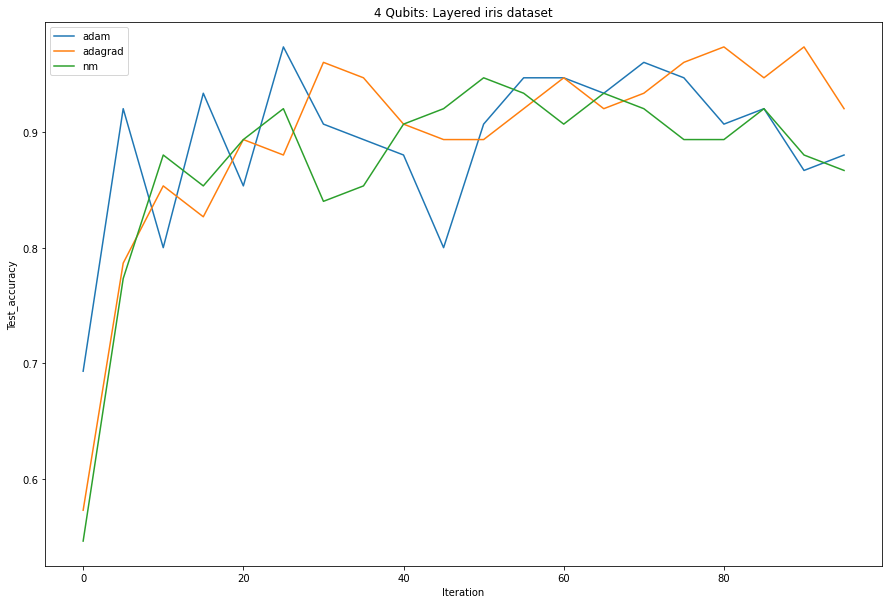

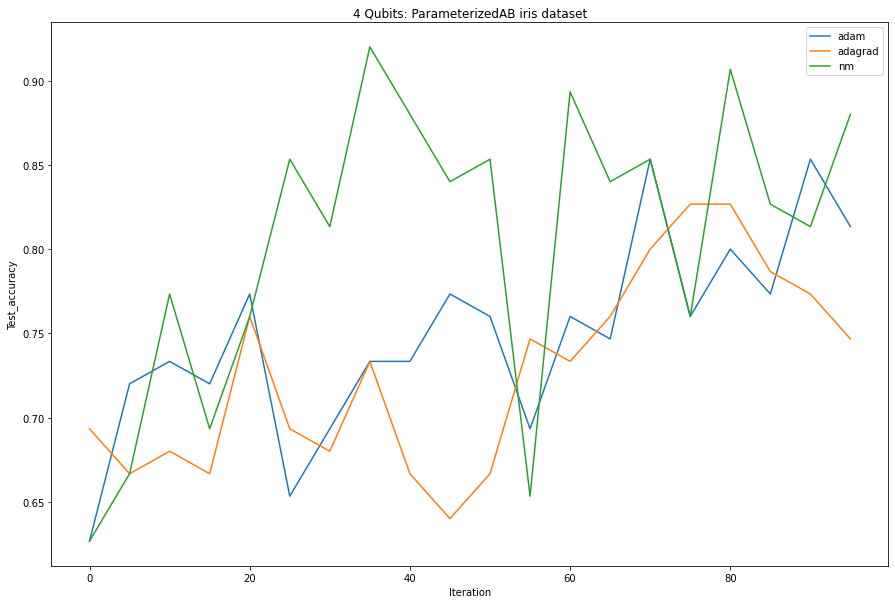

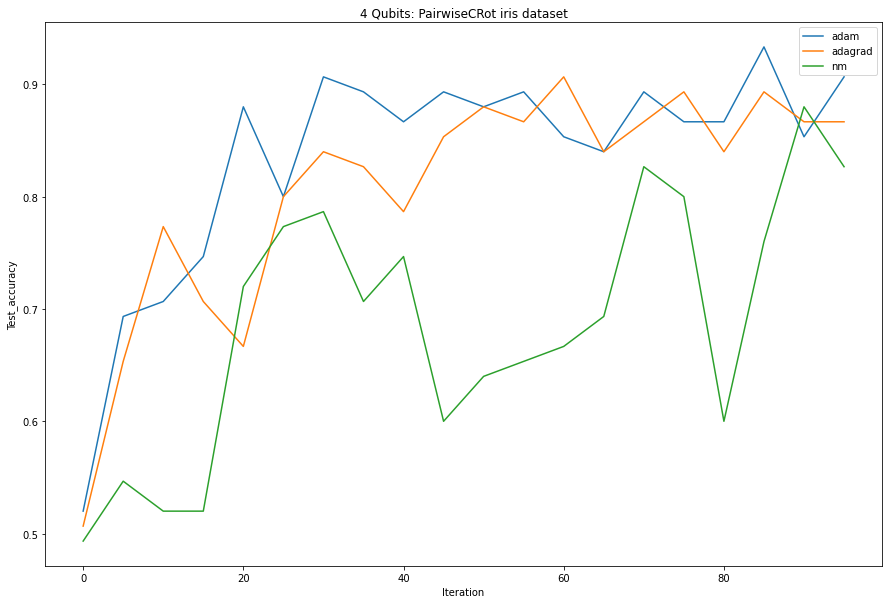

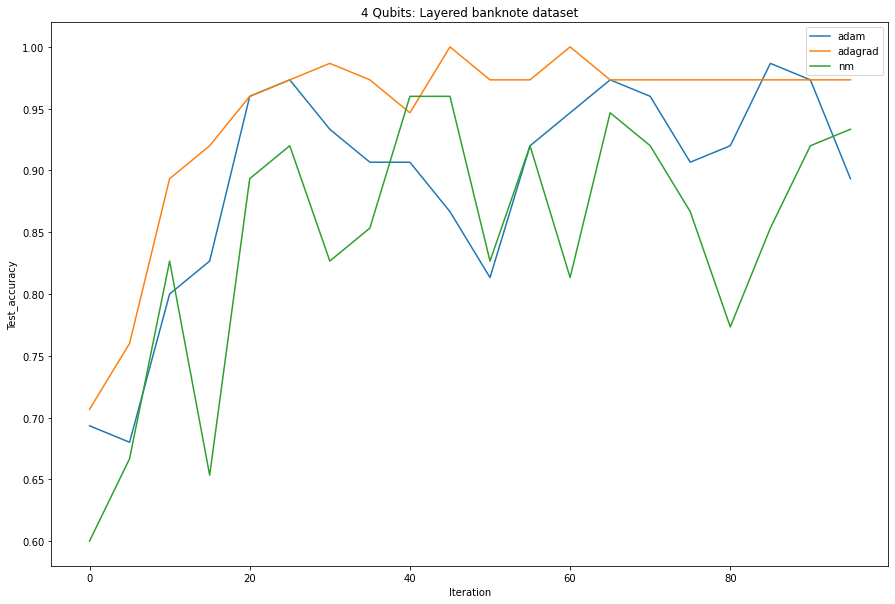

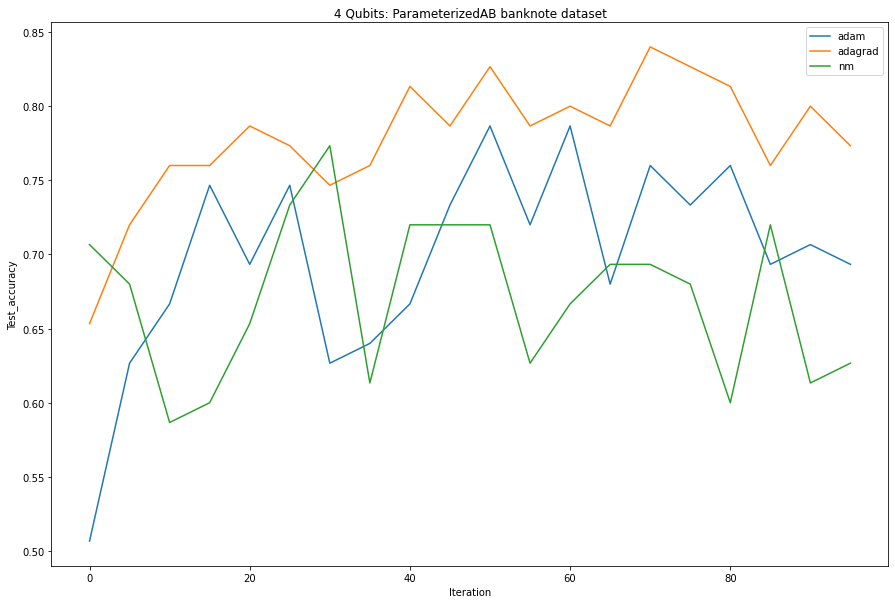

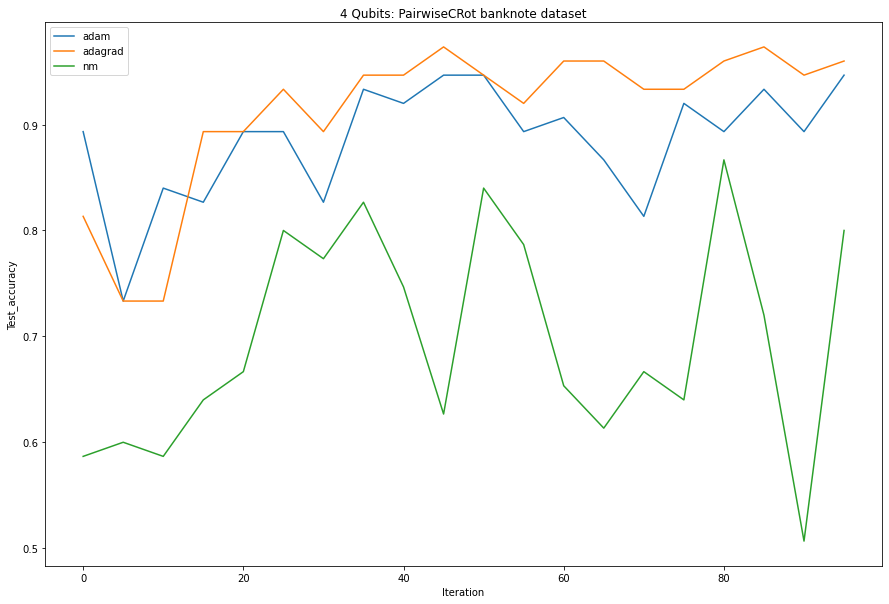

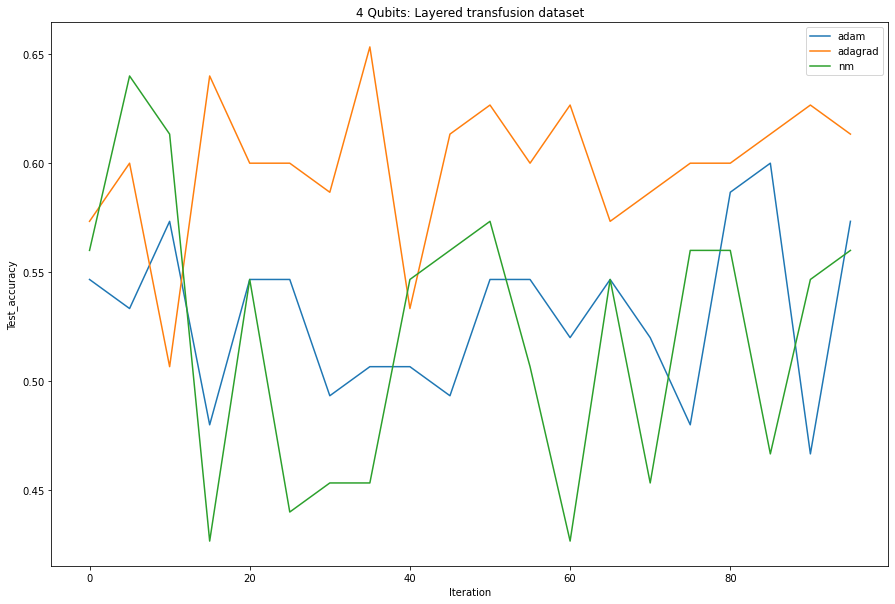

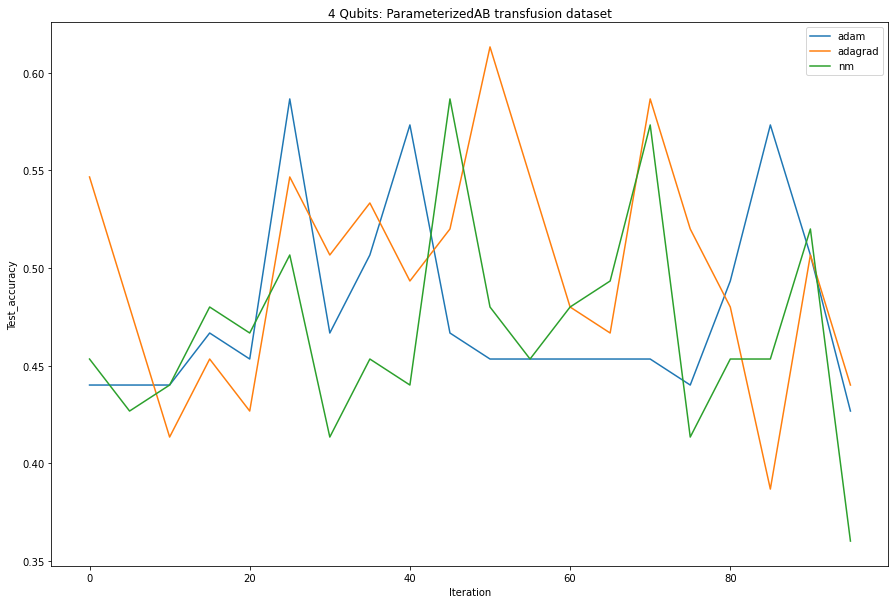

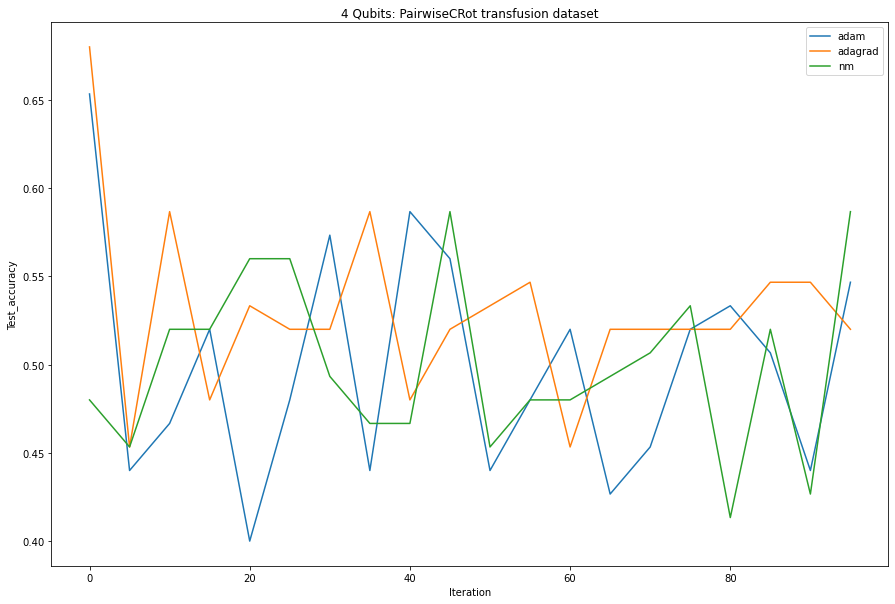

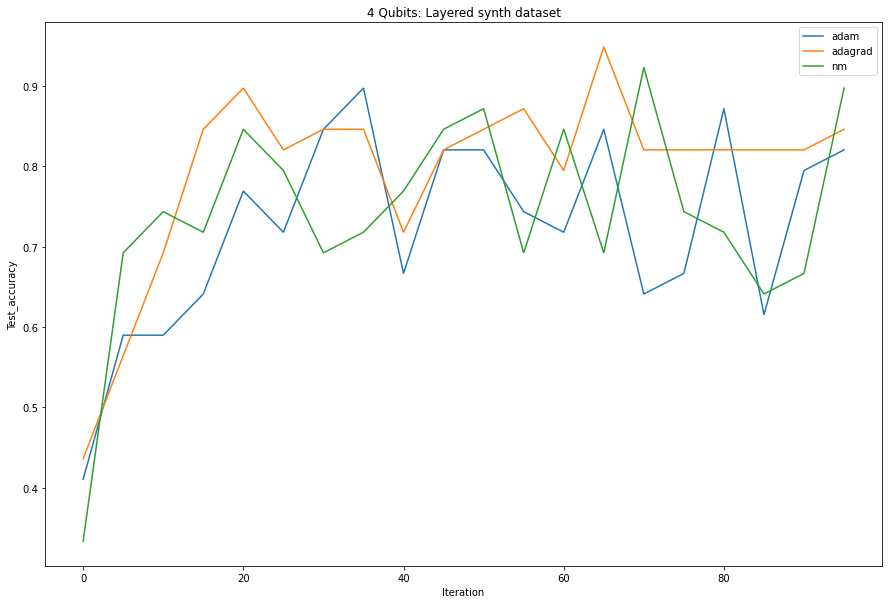

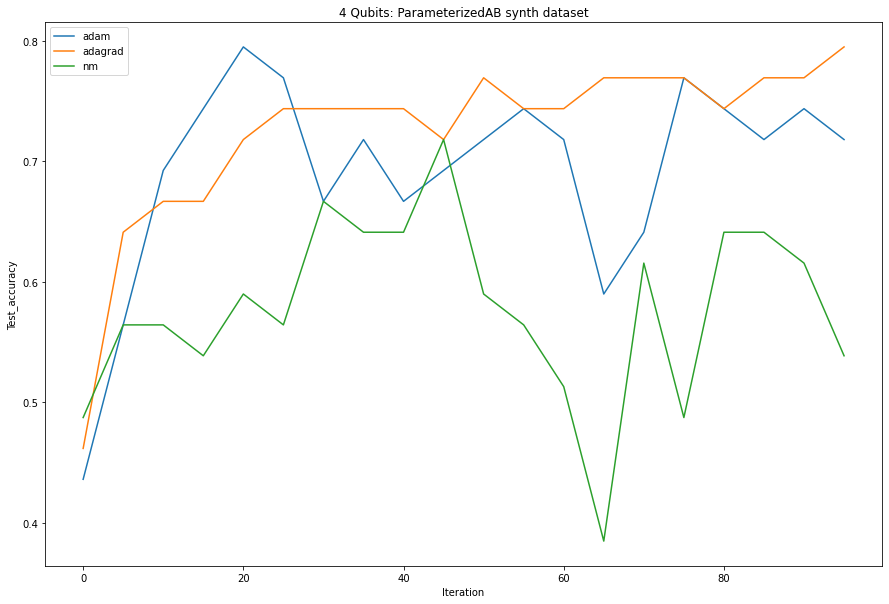

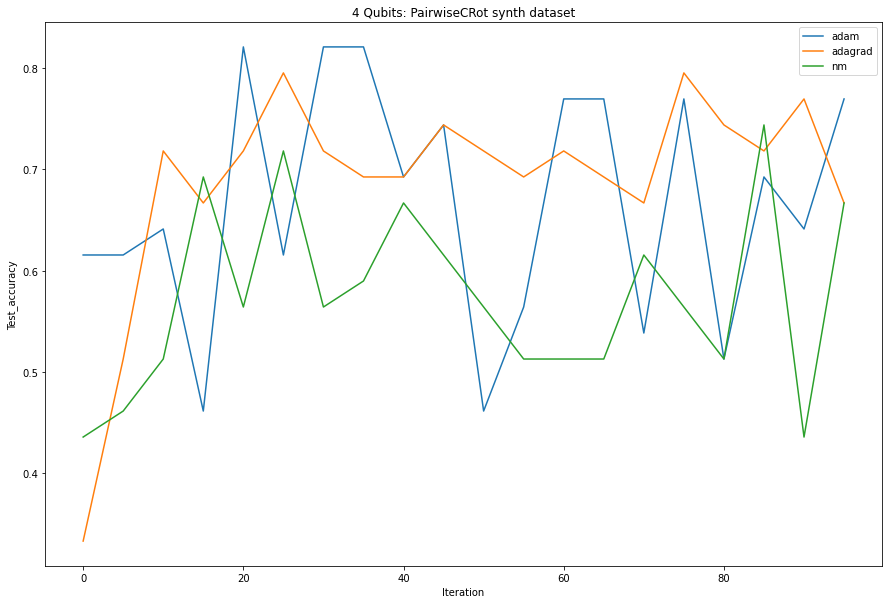

In [3]:
fig_x = 15
fig_y = 10

for data in datasets:
    for t in test:
        plt.figure(figsize=(fig_x, fig_y))
        plt.xlabel("Iteration")
        plt.ylabel("Test_accuracy")
        plt.title('4 Qubits: {} {} dataset'.format(t, data))
        for opt in optimizers:
            plt.plot(results[opt, t, data][1], results[opt, t, data][0], label = opt)

        plt.legend()
        plt.show()